<a href="https://colab.research.google.com/github/misterseyiayeni/Facial_Emotion_Detection_System/blob/main/Facial_Emotion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Problem Definition**

**The context:** from recent research, it has been found that as much as 55% of communication of sentiment takes place through facial expressions and other visual cues. Therefore, training a model to identify facial emotions accurately is an important step towards the development of emotionally intelligent behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses. Facial emotion detection is an area of computer that is very critical to the advancement of several aspects of social living. It can be used for:

  - Human-computer interaction: our engagement with AI-enabled devices can be read and provisioned for (our moods can be read and various actions taken, it can be used to save a human in distress or trouble just by reading their countenance and calling the cops e.g. if someone has been held against their will, fear, anxiety can be read and help can be sought, a patient with a medical condition can be monitored for emergency care etc).

  - CGI-enabled imaging: it can be used to read faces and project that into the screen to appropriately capture facial movements and expressions. Businesses can also leverage this to proactivaly determine engagement with customers.

  - Forensic investigation: in homicide cases, it can be used to estimate the last few minutes, seconds, even possibly hours of victims involved<br>

<br>**The objectives:** Create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions
according to the associated emotion.<br>
**The key questions:**
- How do we reliably source (clean) data and if messy, then perform EDA to make it clean?
- How do we carry out research studies into the application of Artificial Emotional Intelligence and advance its cross-discipline interactions nad applications?
- How do we achieve an almost perfect performance (precision, recall, F1-Score, etc) that will qialify our work as deployment-ready<br>

<br>**The problem formulation:**
- Reliable and accurate identification of facial emotions.
- Gap in human-computer interaction.<br>



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
import os # For working with file paths and directories
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Change the current working directory to my Google Drive folder, and read in the file
os.chdir('/content/drive/MyDrive/')
data_path = "Facial_emotion_images/Facial_emotion_images/"

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
# Import necessary libraries
import random # for ensuring reproducibility
import pandas as pd  # Used for data manipulation and analysis in tabular formats
import seaborn as sns  # Used for creating statistical graphics and data visualization
import numpy as np  # Used for numerical operations and array manipulation
import matplotlib.pyplot as plt  # Used for creating various plots and figures
from sklearn.preprocessing import OneHotEncoder  # Used for categorical feature encoding
import tensorflow as tf  # Core library for building and training neural networks
from sklearn.model_selection import train_test_split  # For splitting data into training and validation sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image augmentation and data loading
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0, ResNet101, EfficientNetV2B2  # Pre-trained models for transfer learning
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU  # Layers for building CNN architectures
from tensorflow.keras.models import Sequential, Model  # For creating sequential and functional model structures
from tensorflow.keras.optimizers import Adam  # Optimizer for training the models
from tensorflow.keras.losses import categorical_crossentropy  # Loss function for multi-class classification
from tensorflow.keras.metrics import Accuracy # Accuracy metric for evaluation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger # Regularization technique to prevent overfitting during model training
from sklearn.metrics import classification_report, confusion_matrix # Generate a report of metrics

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Load and Unzip the Data
# data_name = "Facial_emotion_images.zip"

# # Extract data
# if data_name.endswith(".zip"):
#     import zipfile
#     with zipfile.ZipFile(data_name, 'r') as zip_ref:
#         zip_ref.extractall(data_name[:-4])
#     data_name = data_name[:-4]

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:**
- Even though I only sampled 100 training images in the grid, I can see that a good proportion (over 75%) of the images align with the label of the expressions on the faces. This should be ok for the task ahead. Also, the happy class in all folders is adequately represented.
- Happy faces are expanded, eyes wide open, and can be easily unique compared to other classes so they are identified better than other classes.

Some happy facial expressions in the train dataset are listed below:



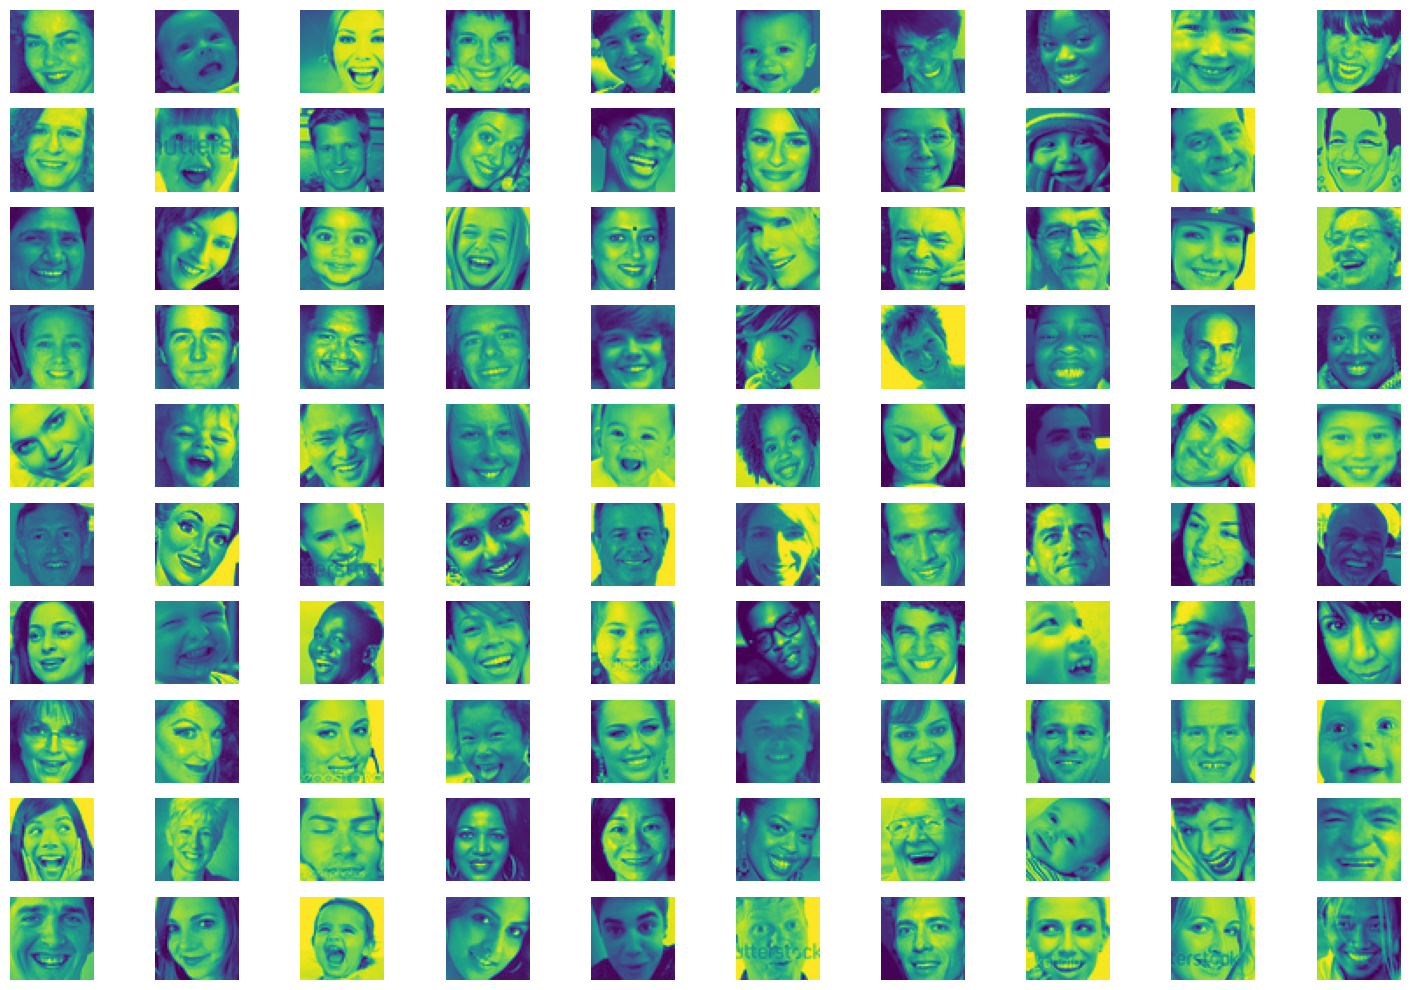

In [ ]:
# Initialize a function that can be used to display images
def display_images(data_file_path, total_num_to_display, images_per_row, emotion_type, dataset_type):
  """Extract and display images containing facial expressions.

    :param data_file_path (string): the path of the images.
    :param total_num_to_display (integer): the total number of images intended to be displayed. If it is less than the total number of images in the path, then the total number of images in the path is displayed.
    :param images_per_row (integer): the number of images per row to display. For ease of visualization, this should be divisible by the total number of images intended to be displayed.
    :param emotion_type (string): type of facial emotion => happy, sad, neutral, surprise)
    :param dataset_type (string): either of train, test, validation
    :return: A grid of images based on the path entered
    """
  print(f"Some {emotion_type} facial expressions in the {dataset_type} dataset are listed below:\n")
  # Get the list of image filenames
  image_filenames = os.listdir(data_file_path)
  # Get the total number of images
  total_images = len(image_filenames)
  # Limit the number of images to display
  num_to_display = min(total_images, total_num_to_display)
  # Create a figure to hold the grid of images
  fig, axes = plt.subplots(num_to_display // images_per_row, images_per_row, figsize=(15, 10))
  # Loop through the image filenames and display them
  for i, filename in enumerate(image_filenames[:num_to_display]):
    row = i // images_per_row
    col = i % images_per_row
    image_path = os.path.join(data_file_path, filename)
    # Read the image
    image = plt.imread(image_path)
    # Display the image on the grid
    axes[row, col].imshow(image)
    # Hide the axes (optional)
    axes[row, col].axis('off')
  # Display the grid of images
  plt.tight_layout()
  plt.show()

# Display happy train images
display_images("Facial_emotion_images/Facial_emotion_images/train/happy", 100, 10, "happy", "train")

### **Sad**

**Observations and Insights:**
- Some of the sad faces are borderline *neutral*. This is understandable because there may be varying degrees of expressing sorrow. It may be gently and calmly and this will resemble a neutral countenance and also for neutral which may be miscontrued for sad. I suspect that the model will have difficulty properly distinguishing between the two. Also there seem to be non-face images in the dataset and this will potentially affect the performance of the model. We'll see.

Some sad facial expressions in the train dataset are listed below:



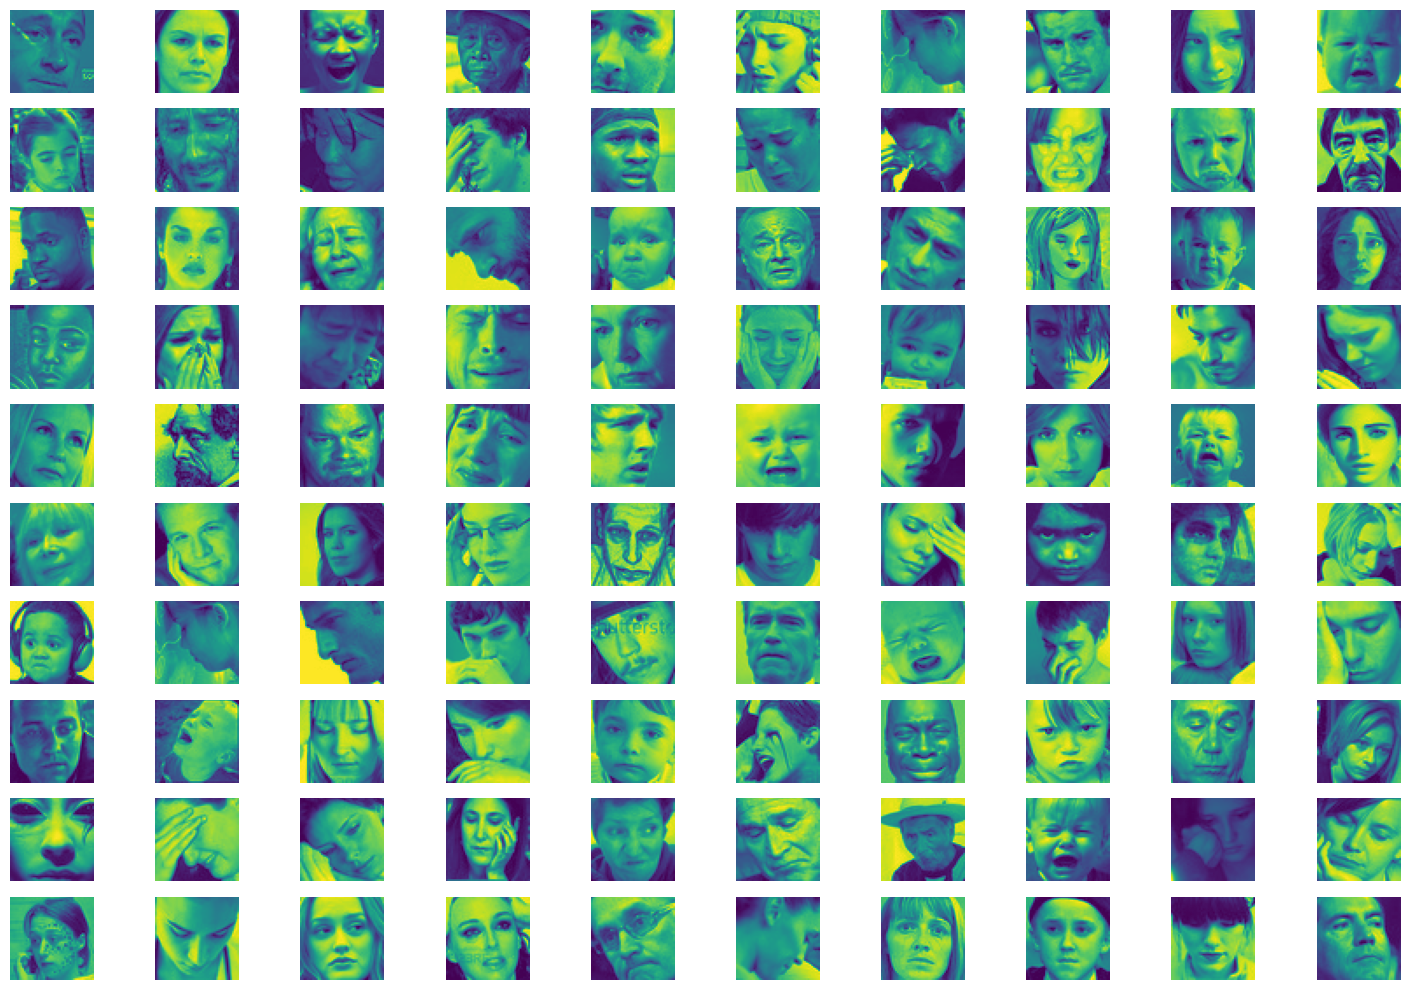

In [ ]:
# Display happy train images
display_images("Facial_emotion_images/Facial_emotion_images/train/sad", 100, 10, "sad", "train")

**Observations and Insights:**
- This has been answered in the *sad* section.

### **Neutral**

Some neutral facial expressions in the train dataset are listed below:



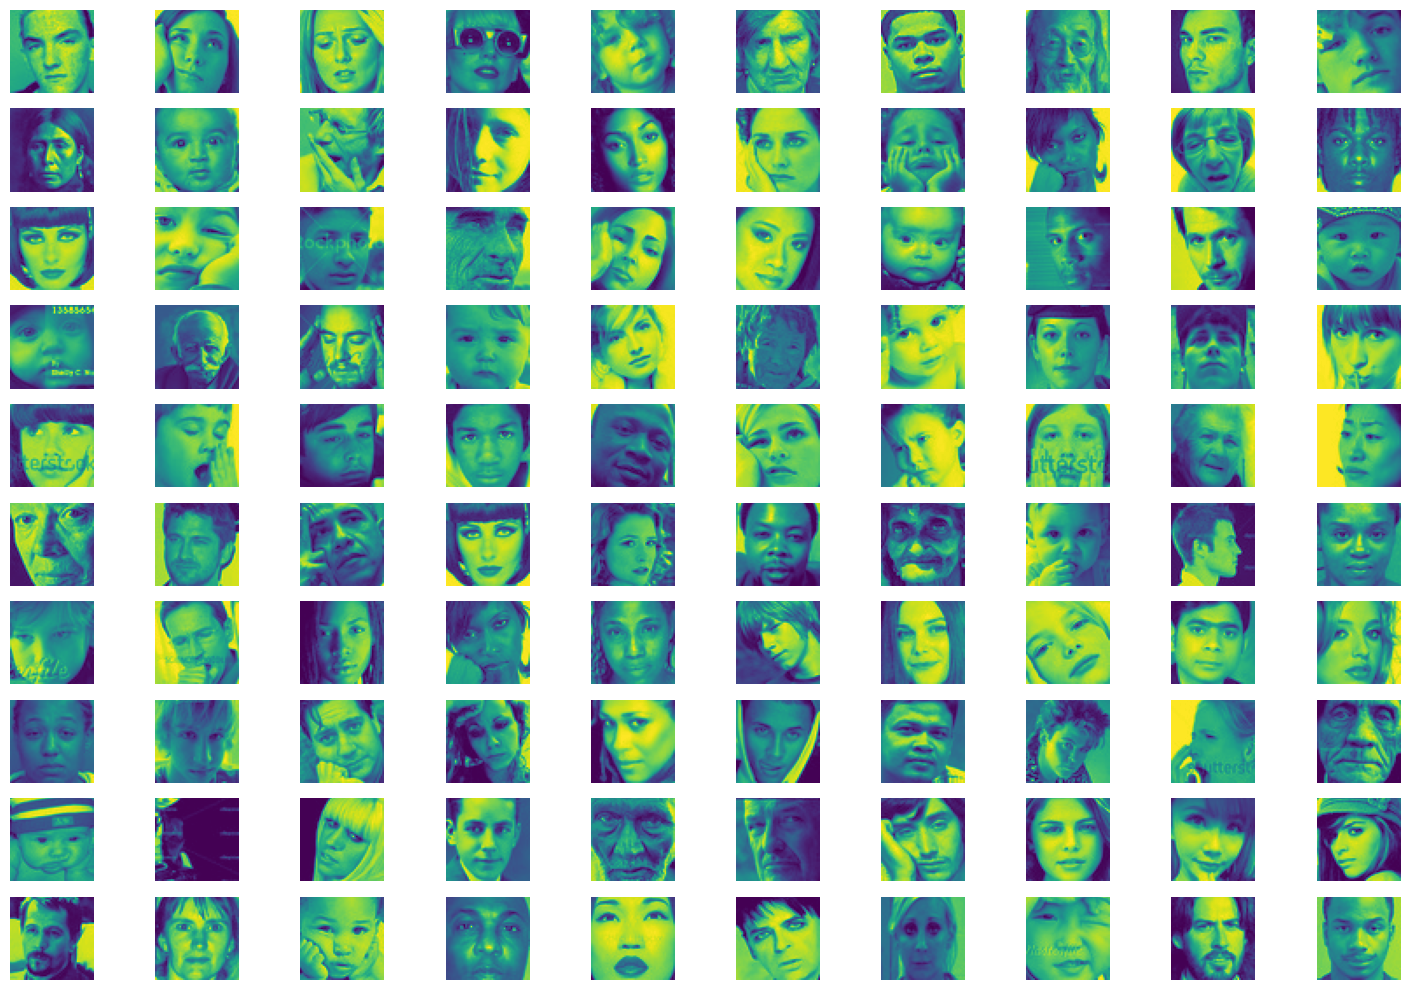

In [ ]:
# Display neutral train images
display_images("Facial_emotion_images/Facial_emotion_images/train/neutral", 100, 10, "neutral", "train")

**Observations and Insights:**

- The color of the images needs to be taken into consideration when training the model as it may impact the performance. We need to see the performance across both channels and determine which is better.

### **Surprised**

**Observations and Insights:**
- Even though there are also non-face images in this folder, it appears the dataset contains images that are commensurate with the emotion expected.

Some surprise facial expressions in the train dataset are listed below:



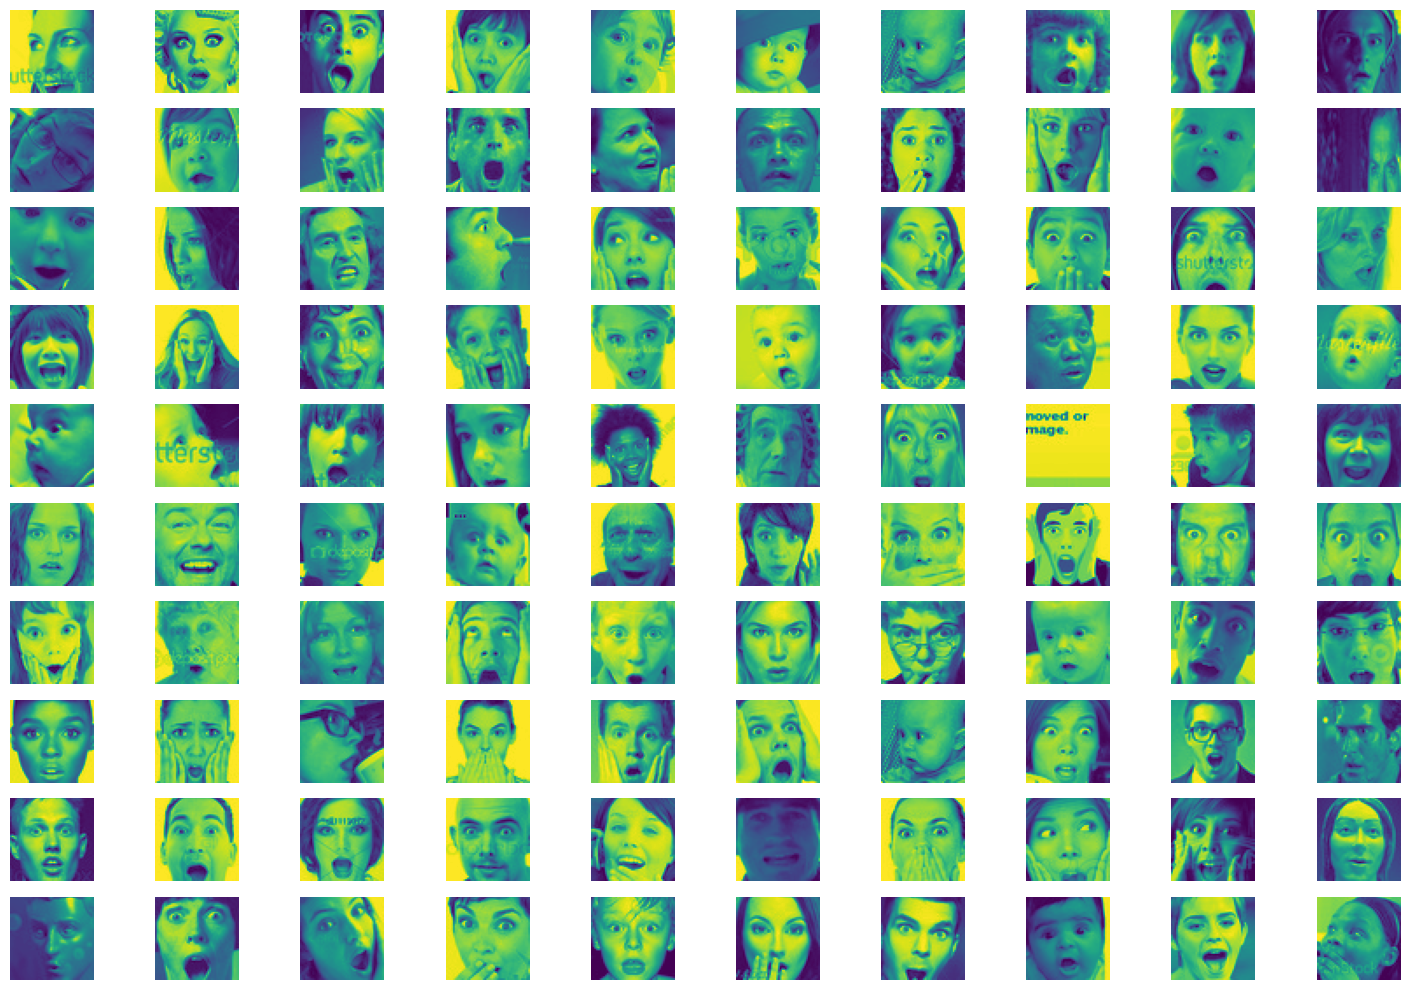

In [ ]:
# Display surprise train images
display_images("Facial_emotion_images/Facial_emotion_images/train/surprise", 100, 10, "surprise", "train")

**Observations and Insights:**

There are non-face images in the dataset. Sad and neutral images look alike.

## **Checking Distribution of Classes**

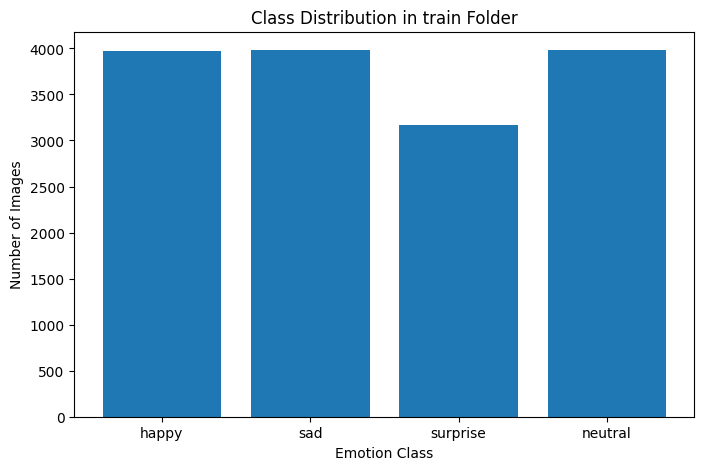

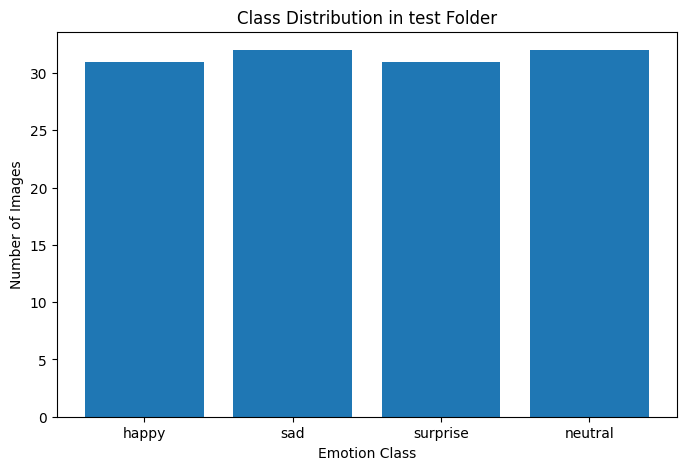

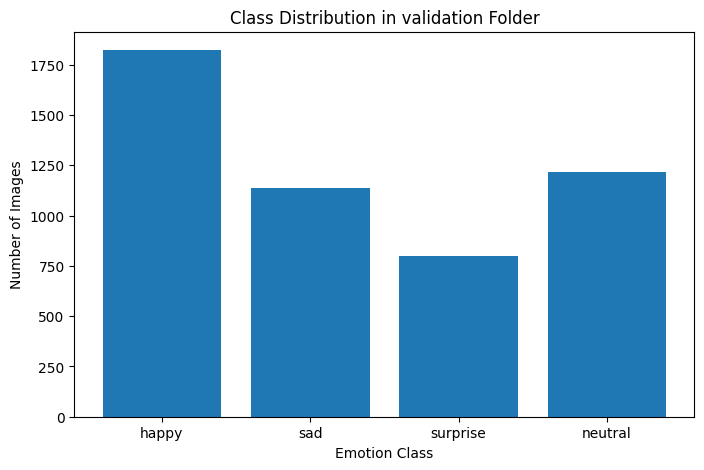

In [ ]:
# Define class labels
class_labels = ['happy', 'sad', 'surprise', 'neutral']

# Iterate through folders and plot distributions
folders = ["train", "test", "validation"]
for folder in folders:
    class_counts = {label: 0 for label in class_labels}
    for label in class_labels:
        class_img_path = os.path.join(data_path, folder, label)
        class_counts[label] = len(os.listdir(class_img_path))

    # Create bar plot with folder-specific title
    plt.figure(figsize=(8, 5))
    plt.bar(class_labels, class_counts.values())
    plt.xlabel("Emotion Class")
    plt.ylabel("Number of Images")
    plt.title(f"Class Distribution in {folder} Folder")
    plt.show()

In [ ]:
# Iterate through folders and store in a DataFrame
data = []
for folder in ["train", "test", "validation"]:
    class_counts = {label: 0 for label in class_labels}
    total_images = 0

    for label in class_labels:
        class_img_path = os.path.join(data_path, folder, label)
        class_counts[label] = len(os.listdir(class_img_path))
        total_images += class_counts[label]

    # Calculate percentages
    class_percentages = {label: (count / total_images) * 100 for label, count in class_counts.items()}

    # Create a DataFrame for each folder
    data.append(pd.DataFrame({
        "Folder": folder,
        "Emotion Class": class_labels,
        "Number of Images": class_counts.values(),
        "Percentage (%)": class_percentages.values()
    }))

# Combine DataFrames into one
Images_df = pd.concat(data)

# Display the DataFrame
print(Images_df.to_string(index=False))

    Folder Emotion Class  Number of Images  Percentage (%)
     train         happy              3976       26.315441
     train           sad              3982       26.355153
     train      surprise              3173       21.000728
     train       neutral              3978       26.328678
      test         happy                32       25.000000
      test           sad                32       25.000000
      test      surprise                32       25.000000
      test       neutral                32       25.000000
validation         happy              1825       36.668676
validation           sad              1139       22.885272
validation      surprise               797       16.013663
validation       neutral              1216       24.432389


**Observations and Insights:**

- The test folder has a balanced distribution of classes.
- The train folder has almost equal distribution with the surprise class lower than the rest.
- The validation folder has a lot of imbalance in the classes.

**Think About It:**
* Globally, The classes are not equally distributed but I do not think the imbalance is too high. The main problem I forsee is that of image quality and dataset cleanness.
* We can visualize countplots of classes across dataset subfolders representing operation (train, test, etc) and globally across facial emotions but the better one is to analyze it across operation.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
# Create Data Loaders for base model color (rgb) input:

# Define image size and batch size
img_size = 48
batch_size = 32

# Data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, brightness_range=(0.,2.), horizontal_flip=True)
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Load data using data generators
train_generator_rgb = train_datagen.flow_from_directory(
    data_path + "/train",
    shuffle = True,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode = 'rgb',
    class_mode='categorical'
)

val_generator_rgb = test_val_datagen.flow_from_directory(
    data_path + "/validation",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle = False,
    color_mode='rgb',
    class_mode='categorical'
)

test_generator_rgb = test_val_datagen.flow_from_directory(
    data_path + "/test",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle = False,
    color_mode = 'rgb',
    class_mode='categorical'
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Convolution Neural Networks (CNNs) are the right approach because they are build to recognize spatial features which qualify them for facial emotion detection and other computer vision areas of study.
* CNNs have the capability to identify dimensionality, spatial features and patterns especially found in images.
* CNNs can detect images regardless of their angle.
* CNNs are also capable of transfer learning i.e. trained in an area and used in another.


### **Creating the Base Neural Network**

In [ ]:
# Clear session before creating the base CNN. This is for color input
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Define base CNN architecture
# Initialize the model
model_CNN1_rgb = Sequential()

# First convolutional block
model_CNN1_rgb.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(img_size, img_size, 3)))
model_CNN1_rgb.add(MaxPooling2D(2, 2))
model_CNN1_rgb.add(Dropout(0.2))

# Second convolutional block
model_CNN1_rgb.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model_CNN1_rgb.add(MaxPooling2D(2, 2))
model_CNN1_rgb.add(Dropout(0.2))

# Third convolutional block
model_CNN1_rgb.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model_CNN1_rgb.add(MaxPooling2D(2, 2))
model_CNN1_rgb.add(Dropout(0.2))

# Flatten and dense layers
model_CNN1_rgb.add(Flatten())
model_CNN1_rgb.add(Dense(512, activation='relu'))
model_CNN1_rgb.add(Dropout(0.4))
model_CNN1_rgb.add(Dense(4, activation='softmax'))

# Print model summary
model_CNN1_rgb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [ ]:
# Create model callback parameters
checkpoint_params_rgb = ModelCheckpoint("./model_CNN1_rgb.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

learningrate_reduc_rgb = ReduceLROnPlateau(monitor = 'loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

early_stopping_params_rgb = EarlyStopping(monitor = 'loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

callbacks_list_rgb = [checkpoint_params_rgb, early_stopping_params_rgb, learningrate_reduc_rgb]


# Compile with Adam optimizer and categorical cross-entropy loss
model_CNN1_rgb.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train base CNN with data augmentation and early stopping
history_CNN1_rgb = model_CNN1_rgb.fit(
    train_generator_rgb,
    epochs=20,
    validation_data=val_generator_rgb,
    callbacks=callbacks_list_rgb
)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3308 - accuracy: 0.3398
Epoch 1: val_loss improved from inf to 1.20650, saving model to ./model_CNN1_rgb.keras
473/473 [==============================] - 1024s 2s/step - loss: 1.3308 - accuracy: 0.3398 - val_loss: 1.2065 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1947 - accuracy: 0.4626
Epoch 2: val_loss improved from 1.20650 to 1.04522, saving model to ./model_CNN1_rgb.keras
473/473 [==============================] - 121s 256ms/step - loss: 1.1947 - accuracy: 0.4626 - val_loss: 1.0452 - val_accuracy: 0.5558 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1093 - accuracy: 0.5107
Epoch 3: val_loss improved from 1.04522 to 0.96502, saving model to ./model_CNN1_rgb.keras
473/473 [==============================] - 90s 190ms/step - loss: 1.1093 - accuracy: 0.5107 - val_loss: 0.9650 - val_accuracy: 0.5986 - lr: 0.0010
Ep

### **Evaluating the Model on the Test Set**

4/4 [==============================] - 15s 5s/step - loss: 0.7220 - accuracy: 0.7344
Base model test accuracy for color input is : 0.734375


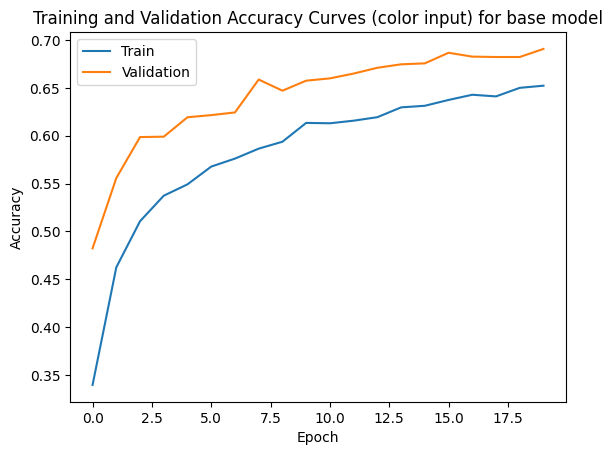

In [ ]:
# Evaluate Base CNN Model on test set
test_loss_CNN1_rgb, test_acc_CNN1_rgb = model_CNN1_rgb.evaluate(test_generator_rgb)
print('Base model test accuracy for color input is :', test_acc_CNN1_rgb)
plt.plot(history_CNN1_rgb.history['accuracy'], label='Train Accuracy')
plt.plot(history_CNN1_rgb.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves (color input) for base model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations and Insights:**

- The model performance is ok for starters but it seems to be overfitting a bit. This is good-enough performance for a base model and it gives some wiggle room for improvement. I also tried grayscale and color input. Color input was better so I have decided to continue with color input unless otherwise advised.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Clear session and set random seeds
tf.keras.backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Define, compile, and fit the base model again for rgb (color) input
# Define input shape based on color mode

# Define the model architecture
model_CNN2 = Sequential()

# First convolutional block
model_CNN2.add(Conv2D(256, (2, 2), padding='same', activation='relu', input_shape=(img_size, img_size, 3)))
model_CNN2.add(BatchNormalization())
model_CNN2.add(LeakyReLU(alpha=0.1))  # LeakyReLU with alpha=0.1
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model_CNN2.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(LeakyReLU(alpha=0.1))
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model_CNN2.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(LeakyReLU(alpha=0.1))
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model_CNN2.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(LeakyReLU(alpha=0.1))
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and dense layers
model_CNN2.add(Flatten())
model_CNN2.add(Dense(512, activation='relu'))
model_CNN2.add(Dense(128, activation='relu'))
model_CNN2.add(Dense(4, activation='softmax'))

# Print model summary
model_CNN2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

### **Compiling and Training the Model**

In [ ]:
# Create model callback parameters
checkpoint_params_CNN2 = ModelCheckpoint("./model_CNN2.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

learningrate_reduc_rgb_CNN2 = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

early_stopping_params_rgb_CNN2 = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

callbacks_list_rgb_CNN2 = [checkpoint_params_CNN2, early_stopping_params_rgb_CNN2, learningrate_reduc_rgb_CNN2]

# Compile and train Second CNN Model
model_CNN2.compile(loss='categorical_crossentropy',
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])
history_CNN2 = model_CNN2.fit(train_generator_rgb,
                              epochs=20,
                              validation_data=val_generator_rgb,
                              callbacks=callbacks_list_rgb_CNN2)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2945 - accuracy: 0.3655
Epoch 1: val_loss improved from inf to 1.29130, saving model to ./model_CNN2.keras
473/473 [==============================] - 175s 365ms/step - loss: 1.2945 - accuracy: 0.3655 - val_loss: 1.2913 - val_accuracy: 0.4360 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1199 - accuracy: 0.4859
Epoch 2: val_loss improved from 1.29130 to 1.24657, saving model to ./model_CNN2.keras
473/473 [==============================] - 175s 369ms/step - loss: 1.1199 - accuracy: 0.4859 - val_loss: 1.2466 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9996 - accuracy: 0.5621
Epoch 3: val_loss improved from 1.24657 to 1.12929, saving model to ./model_CNN2.keras
473/473 [==============================] - 175s 371ms/step - loss: 0.9996 - accuracy: 0.5621 - val_loss: 1.1293 - val_accuracy: 0.4919 - lr: 0.0010
Epoch 4/20


### **Evaluating the Model on the Test Set**

4/4 [==============================] - 1s 134ms/step - loss: 0.7097 - accuracy: 0.6719
Second model test accuracy (color input) is : 0.671875


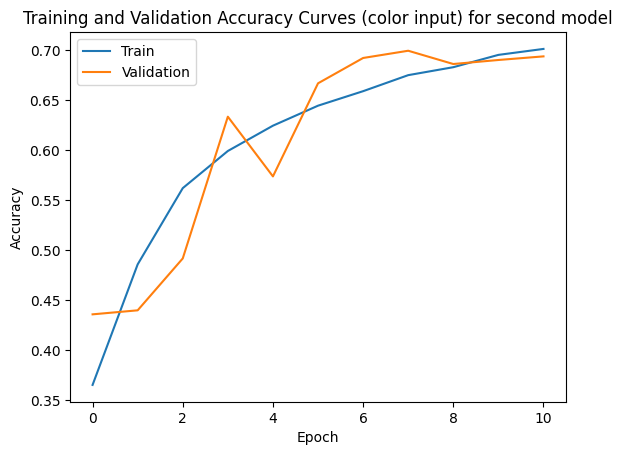

In [ ]:
# Evaluate on test set and plot the accuracy curves
test_loss_CNN2, test_acc_CNN2 = model_CNN2.evaluate(test_generator_rgb)
print('Second model test accuracy (color input) is :', test_acc_CNN2)
plt.plot(history_CNN2.history['accuracy'], label='Train Accuracy')
plt.plot(history_CNN2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves (color input) for second model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations and Insights:**

* This second model did not perform as well as the first model. We will need a pivot strategy and do something quite different to know why this dip in performance.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
# Create a data loader
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_generator_trf_rgb = datagen_train.flow_from_directory(data_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

# Create validation data generator
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create validation set using the validation directory
val_generator_trf_rgb = datagen_validation.flow_from_directory(data_path + "validation",
                                                      target_size = (img_size, img_size),
                                                      color_mode = 'rgb',
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical',
                                                      classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                      shuffle = False)

# Create a test data generator without modifications
datagen_test = ImageDataGenerator(rescale=1./255)

# Create the test set using the test directory
test_generator_trf_rgb = datagen_test.flow_from_directory(data_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4974 images belonging to 4 classes.
Found 126 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
# Clear session before creating transfer learning models
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Import and freeze pre-trained VGG16 layers up to a certain layer
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Freeze pre-trained layers
for layer in vgg16.layers:
    layer.trainable = False

# Add custom top layers
x = vgg16.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
pred_vgg16 = Dense(4, activation='softmax')(x)

### **Compiling and Training the VGG16 Model**

In [ ]:
# Create callback parameters
checkpoint_trf_vgg = ModelCheckpoint("./vggmodel.keras", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')

early_stopping_trf_vgg = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate_trf_vgg = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list_trf_vgg = [early_stopping_trf_vgg, checkpoint_trf_vgg, reduce_learningrate_trf_vgg]

# Clear session before creating new VGG16 model
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Create new model using pre-trained base and custom layers
model_vgg16 = Model(inputs=vgg16.input, outputs=pred_vgg16)

# Compile and train VGG16 model
model_vgg16.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_vgg16 = model_vgg16.fit(
    train_generator_trf_rgb,
    epochs=20,
    validation_data=val_generator_trf_rgb,
    callbacks=[callbacks_list_trf_vgg]
)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2307 - accuracy: 0.4271
Epoch 1: val_loss improved from inf to 1.12652, saving model to ./vggmodel.keras
473/473 [==============================] - 145s 303ms/step - loss: 1.2307 - accuracy: 0.4271 - val_loss: 1.1265 - val_accuracy: 0.5124 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1655 - accuracy: 0.4710
Epoch 2: val_loss improved from 1.12652 to 1.09059, saving model to ./vggmodel.keras
473/473 [==============================] - 144s 304ms/step - loss: 1.1655 - accuracy: 0.4710 - val_loss: 1.0906 - val_accuracy: 0.5335 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1470 - accuracy: 0.4840
Epoch 3: val_loss improved from 1.09059 to 1.07949, saving model to ./vggmodel.keras
473/473 [==============================] - 143s 302ms/step - loss: 1.1470 - accuracy: 0.4840 - val_loss: 1.0795 - val_accuracy: 0.5421 - lr: 0.0010
Epoch 4/20
473/47

### **Evaluating the VGG16 model**

In [ ]:
# Evaluate on test set
test_loss, test_acc = model_vgg16.evaluate(test_generator_trf_rgb)
print('Test accuracy for VGG16 model (color input) is:', test_acc)

4/4 [==============================] - 1s 231ms/step - loss: 1.1293 - accuracy: 0.4688
Test accuracy for VGG16 model (color input) is: 0.46875


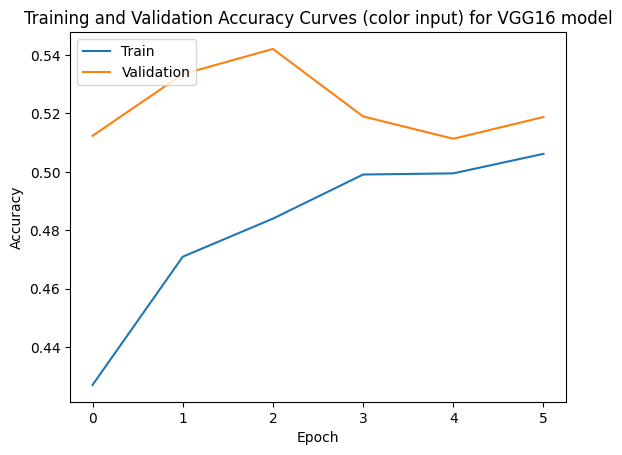

In [ ]:
# Plot the accuracy curves
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves (color input) for VGG16 model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Think About It:**

- The general trend in training performance is getting worse.
- The training accuracy is not getting better.
- The validation accuracy is also not getting better.

**Observations and Insights:**

The training performance of the VGG16 model is much less than the former two models I trained earlier. The model early-stopped on the 6th epoch. I think this has to do with the features the model was pretrained on e.g. dimension, channel, etc. The accuracy goes up then comes down.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:
# Clear session before creating Resnet v2 model
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Import and freeze pre-trained ResNet v2 layers up to a certain layer
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

# Add custom layers on top
x = resnet.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
pred_resnet = Dense(4, activation='softmax')(x)

resnetmodel = Model(resnet.input, pred_resnet)  # Initializing the model

### **Compiling and Training the Model**

In [ ]:
# Create callback parameters
checkpoint_trf_resnet = ModelCheckpoint("./resnetmodel.keras", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

early_stopping_trf_resnet = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate_trf_resnet = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list_trf_resnet = [early_stopping_trf_resnet, checkpoint_trf_resnet, reduce_learningrate_trf_resnet]

# Clear session before creating new Resnet v2 model
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Create new Resnet model
model_resnet = Model(inputs=resnetmodel.input, outputs=pred_resnet)

# Compile and train
model_resnet.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
history_resnet = model_resnet.fit(train_generator_trf_rgb, epochs=20, validation_data=val_generator_trf_rgb, callbacks=[callbacks_list_trf_resnet])

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3690 - accuracy: 0.2917
Epoch 1: val_accuracy improved from -inf to 0.29054, saving model to ./resnetmodel.keras
473/473 [==============================] - 114s 233ms/step - loss: 1.3690 - accuracy: 0.2917 - val_loss: 1.3390 - val_accuracy: 0.2905 - lr: 1.0000e-04
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.3281 - accuracy: 0.3327
Epoch 2: val_accuracy improved from 0.29054 to 0.38196, saving model to ./resnetmodel.keras
473/473 [==============================] - 111s 233ms/step - loss: 1.3281 - accuracy: 0.3327 - val_loss: 1.2927 - val_accuracy: 0.3820 - lr: 1.0000e-04
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3046 - accuracy: 0.3554
Epoch 3: val_accuracy improved from 0.38196 to 0.40104, saving model to ./resnetmodel.keras
473/473 [==============================] - 111s 235ms/step - loss: 1.3046 - accuracy: 0.3554 - val_loss: 1.2704 - val_accuracy: 0.4010 

### **Evaluating the ResNet Model**

In [ ]:
# Evaluate on test set
test_loss, test_acc = model_resnet.evaluate(test_generator_trf_rgb)
print('Test accuracy for resnet model (color input):', test_acc)

4/4 [==============================] - 1s 151ms/step - loss: 1.3440 - accuracy: 0.3203
Test accuracy for resnet model (color input): 0.3203125


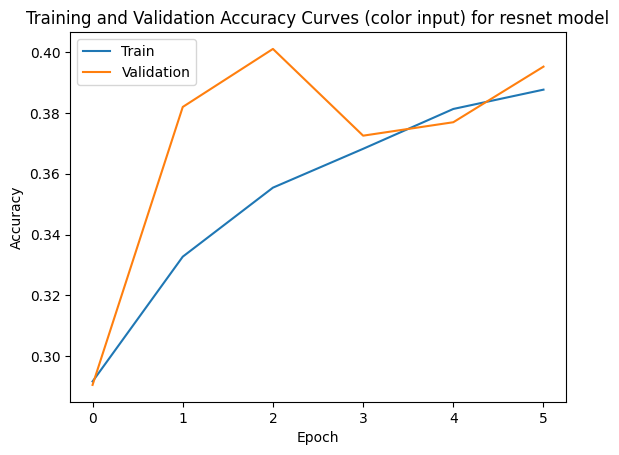

In [ ]:
# Plot the accuracy curves
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves (color input) for resnet model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations and Insights:**

The performance is worse than all the models built before this and it shows signs of overfitting. The model early-stopped on the 6th epoch.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
# Clear session before creating EfficientNet model
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Import and freeze pre-trained EfficientNet
efficientnet = EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))
efficientnet.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 24, 24, 32)           864       ['normalizatio

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Freeze the model
transfer_layer_EfficientNet = efficientnet.get_layer('block6e_expand_activation')
efficientnet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation='relu')(x)  # Add a Dense layer with 256 neurons and ReLU activation
x = BatchNormalization()(x)  # Add BatchNormalization
# Add your final Dense layer with 4 neurons and softmax activation function.
pred_efficientnet = Dense(4, activation='softmax')(x)

efficientnetmodel = Model(efficientnet.input, pred_efficientnet)

### **Compiling and Training the Model**

In [ ]:
# Creating model callback parameters

checkpoint_trf_efficientnet = ModelCheckpoint("./efficientnetmodel.keras", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')

early_stopping_trf_efficientnet = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate_trf_efficientnet = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list_trf_efficientnet = [early_stopping_trf_efficientnet, checkpoint_trf_efficientnet, reduce_learningrate_trf_efficientnet]

# Clear session before creating new EfficientNet model
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Create new EfficientNet model
model_efficientnet = Model(inputs=efficientnet.input, outputs=pred_efficientnet)

# Compile and train
model_efficientnet.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
history_efficientnet = model_efficientnet.fit(train_generator_trf_rgb, epochs=20, validation_data=val_generator_trf_rgb, callbacks=[callbacks_list_trf_efficientnet])

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3968 - accuracy: 0.2657
Epoch 1: val_loss improved from inf to 1.79717, saving model to ./efficientnetmodel.keras
473/473 [==============================] - 1055s 2s/step - loss: 1.3968 - accuracy: 0.2657 - val_loss: 1.7972 - val_accuracy: 0.3665 - lr: 1.0000e-04
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.3875 - accuracy: 0.2797
Epoch 2: val_loss did not improve from 1.79717
473/473 [==============================] - 178s 377ms/step - loss: 1.3875 - accuracy: 0.2797 - val_loss: 1.8139 - val_accuracy: 0.3719 - lr: 1.0000e-04
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.2836
Epoch 3: val_loss did not improve from 1.79717
473/473 [==============================] - 175s 370ms/step - loss: 1.3853 - accuracy: 0.2836 - val_loss: 1.9199 - val_accuracy: 0.1602 - lr: 1.0000e-04
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.38

### **Evaluating the EfficientnetNet Model**

In [ ]:
# Evaluate on test set
test_loss, test_acc = model_efficientnet.evaluate(test_generator_trf_rgb)
print('Test accuracy:', test_acc)

4/4 [==============================] - 31s 10s/step - loss: 1.3995 - accuracy: 0.2778
Test accuracy: 0.2777777910232544


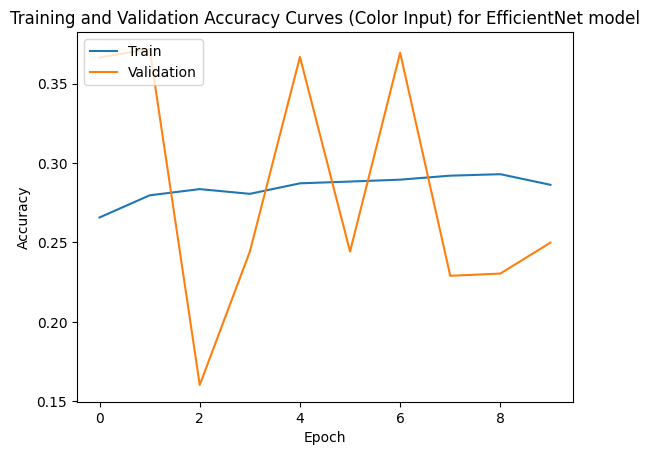

In [ ]:
# Plot the accuracy curves
plt.plot(history_efficientnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves (Color Input) for EfficientNet model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations and Insights:**

This is the lowest. The model doesn't seem to know what is going on. It seems this data is entirely strange to the model.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
# Create data Loaders for complex model

batch_size  = 32
img_size = 48

datagen_train_complex_gray = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_generator_complex_gray = datagen_train_complex_gray.flow_from_directory(data_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

# Create validation data generator
datagen_validation_complex_gray = ImageDataGenerator(rescale=1./255)

# Create validation set using the validation directory
val_generator_complex_gray = datagen_validation_complex_gray.flow_from_directory(data_path + "validation",
                                                      target_size = (img_size, img_size),
                                                      color_mode = 'grayscale',
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical',
                                                      classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                      shuffle = False)

# Create a test data generator without modifications
datagen_test_complex_gray = ImageDataGenerator(rescale=1./255)

# Create the test set using the test directory
test_generator_complex_gray = datagen_test_complex_gray.flow_from_directory(data_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4974 images belonging to 4 classes.
Found 126 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
# Clear session before creating complex Convolutional Neural Network
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Complex CNN Architecture:

# Define a complex CNN architecture
model_complex = Sequential()

# Add 1st CNN Block
model_complex.add(Conv2D(64, kernel_size=2, padding='same', input_shape=(48, 48, 1), activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Add 2nd CNN Block
model_complex.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Add 3rd CNN Block
model_complex.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Add 4th CNN Block
model_complex.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Add 5th CNN Block
model_complex.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Flatten the output
model_complex.add(Flatten())

# First fully connected layer
model_complex.add(Dense(256, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.2))

# Second fully connected layer
model_complex.add(Dense(512, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.2))

# Output layer with 4 neurons and softmax activation
model_complex.add(Dense(4, activation='softmax'))

### **Compiling and Training the Model**

In [ ]:
# Create callback parameters
steps_per_epoch_model_complex = train_generator_complex_gray.n // train_generator_complex_gray.batch_size  # Calculate steps per epoch for training
validation_steps_model_complex = val_generator_complex_gray.n // val_generator_complex_gray.batch_size  # Calculate steps per epoch for validation

# Callbacks:

# 1. ModelCheckpoint:
checkpoint_model_complex = ModelCheckpoint(
    "./model_complex.keras",  # Save the model to this file
    monitor="val_accuracy",  # Monitor validation accuracy
    save_weights_only=True,  # Save only model weights, not the entire architecture
    model="max",  # Save only the best model with highest validation accuracy
    verbose=1  # Print a message when saving the model
)

# 2. ReduceLROnPlateau:
reduce_lr_model_complex = ReduceLROnPlateau(
    monitor="val_loss",  # Monitor validation loss
    factor=0.1,  # Reduce learning rate by 10x if validation loss plateaus
    patience=2,  # Wait for 2 epochs of no improvement before reducing learning rate
    min_lr=0.0001,  # Set a minimum learning rate
    model="auto"  # Automatically choose which model to monitor
)

callbacks_model_complex = [checkpoint_model_complex, reduce_lr_model_complex]  # Create a list of callbacks to use during training


# Compile and train
model_complex.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.003),
    metrics=['accuracy']
)

history_complex = model_complex.fit(
    train_generator_complex_gray,
    epochs=35,
    validation_data=val_generator_complex_gray,
    callbacks=[callbacks_model_complex]
)

Epoch 1/35
473/473 [==============================] - ETA: 0s - loss: 1.5927 - accuracy: 0.2610
Epoch 1: saving model to ./model_complex.keras
473/473 [==============================] - 177s 368ms/step - loss: 1.5927 - accuracy: 0.2610 - val_loss: 1.5560 - val_accuracy: 0.2636 - lr: 0.0030
Epoch 2/35
473/473 [==============================] - ETA: 0s - loss: 1.4676 - accuracy: 0.2661
Epoch 2: saving model to ./model_complex.keras
473/473 [==============================] - 124s 261ms/step - loss: 1.4676 - accuracy: 0.2661 - val_loss: 1.3739 - val_accuracy: 0.3159 - lr: 0.0030
Epoch 3/35
473/473 [==============================] - ETA: 0s - loss: 1.4289 - accuracy: 0.2899
Epoch 3: saving model to ./model_complex.keras
473/473 [==============================] - 123s 260ms/step - loss: 1.4289 - accuracy: 0.2899 - val_loss: 1.3634 - val_accuracy: 0.2962 - lr: 0.0030
Epoch 4/35
473/473 [==============================] - ETA: 0s - loss: 1.3223 - accuracy: 0.3540
Epoch 4: saving model to ./mode

### **Evaluating the Model on Test Set**

In [ ]:
# Evaluate on test set
test_loss_model_complex, test_acc_model_complex = model_complex.evaluate(val_generator_complex_gray)
print('Test accuracy for complex CNN model:', test_acc_model_complex)

156/156 [==============================] - 18s 112ms/step - loss: 0.6370 - accuracy: 0.7498
Test accuracy for complex CNN model: 0.7498493194580078


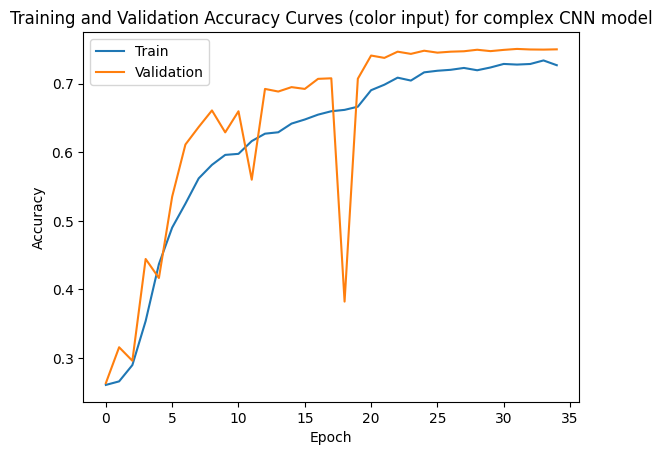

In [ ]:
# Plot the accuracy curves
plt.plot(history_complex.history['accuracy'], label='Train Accuracy')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves (color input) for complex CNN model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations and Insights:**

The accuracy of this complex CNN is the best but there was a sharp temporary dip at the 19th epoch. Something seems to be confusing the model and it appears to be overfitting. I will investigate this.

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 45ms/step


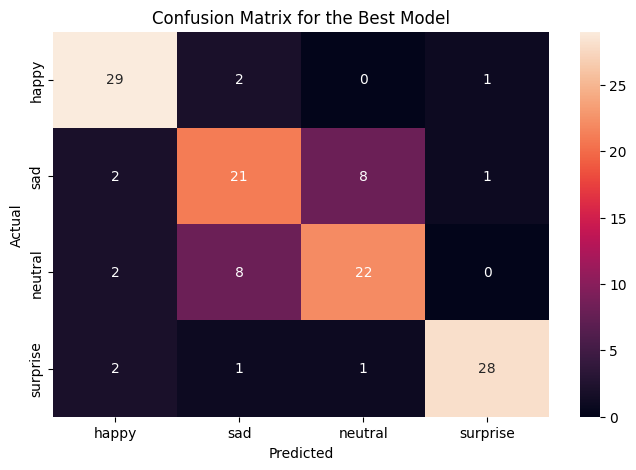

In [ ]:
# Confusion Matrix:

best_model = model_complex

# Create a test data generator without modifications
datagen_test_complex_gray = ImageDataGenerator(rescale=1./255)

# Create the test set using the test directory
test_generator_complex_gray = datagen_test_complex_gray.flow_from_directory(data_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = 128,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)

test_images_model_complex, test_labels_model_complex = next(test_generator_complex_gray)

# Predict with the model
pred_model_complex = model_complex.predict(test_images_model_complex)
pred_model_complex = np.argmax(pred_model_complex, axis = 1)
y_true_model_complex = np.argmax(test_labels_model_complex, axis = 1)

# Plot the heatmap using the confusion matrix
cm = confusion_matrix(y_true_model_complex, pred_model_complex)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for the Best Model')
plt.show()

In [ ]:
# Print the classification report
print(classification_report(y_true_model_complex, pred_model_complex, target_names=['happy', 'sad', 'neutral', 'surprise']))

              precision    recall  f1-score   support

       happy       0.83      0.91      0.87        32
         sad       0.66      0.66      0.66        32
     neutral       0.71      0.69      0.70        32
    surprise       0.93      0.88      0.90        32

    accuracy                           0.78       128
   macro avg       0.78      0.78      0.78       128
weighted avg       0.78      0.78      0.78       128



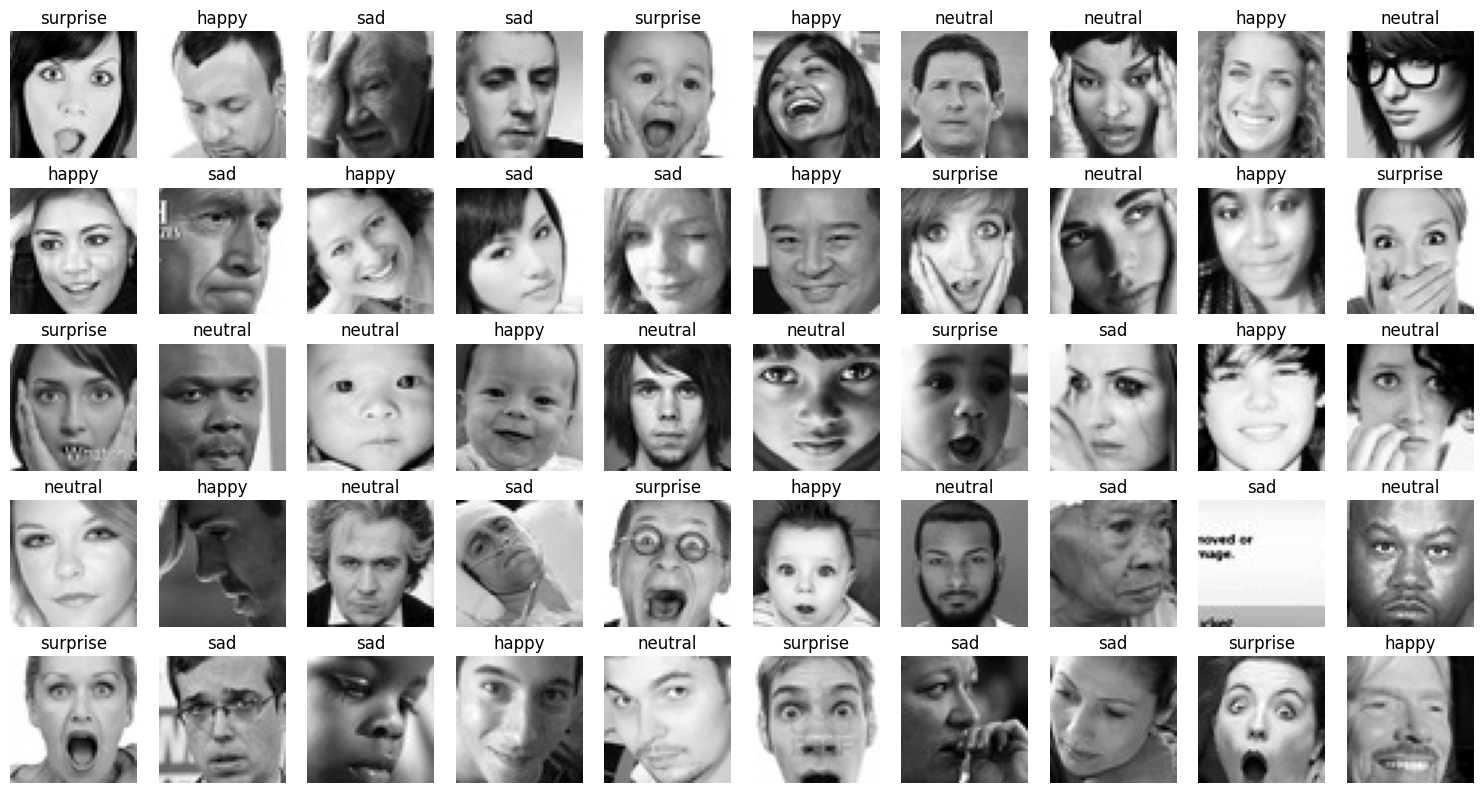

In [ ]:
# Now, we will now predict using the best model

# Map predictions to class labels
class_labels = ['happy', 'sad', 'neutral', 'surprise']  # Adjust based on your classes
predicted_labels = [class_labels[i] for i in pred_model_complex]

# Create a grid of 50 images with predictions
n_rows = 5
n_cols = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))

for i, ax in enumerate(axes.flat):
    if i < len(test_images_model_complex):
        ax.imshow(test_images_model_complex[i], cmap='gray')
        ax.set_title(predicted_labels[i])
        ax.axis('off')
    else:
        ax.axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

In [ ]:
# I will use the mtcnn (Multi-task Cascaded Convolutional Networks) package to detect non-face images
# !pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.3 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step


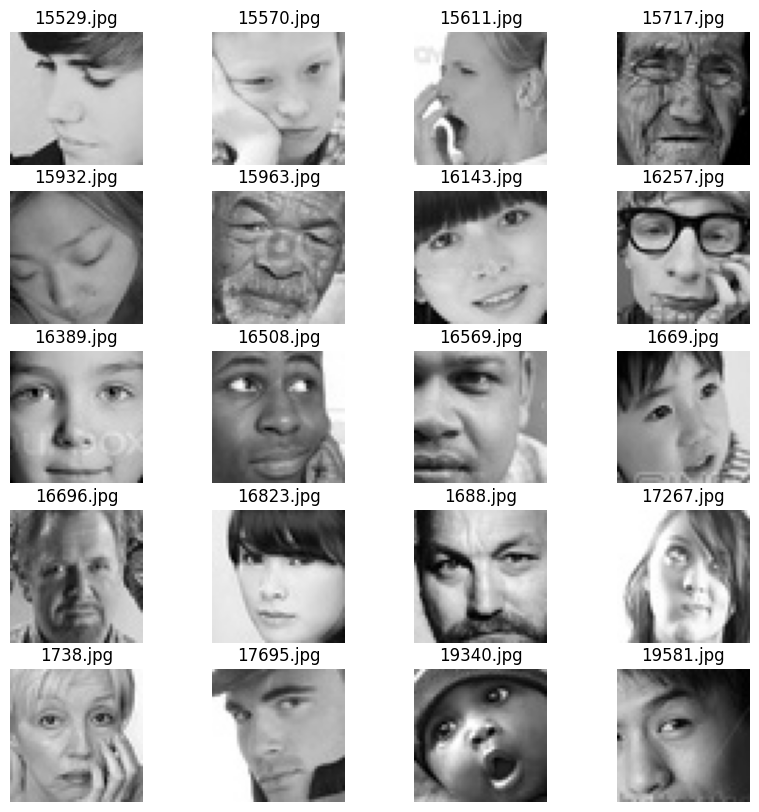

In [ ]:
# Detect non-faces in the dataset
from mtcnn import MTCNN
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Initialize the MTCNN detector
detector = MTCNN()

# Specify the directory
dir_path = "Facial_emotion_images/Facial_emotion_images/validation/neutral"

# Initialize a list to store non-face images and their filenames
non_faces = []
non_face_filenames = []

# Loop through the files in the directory
for filename in os.listdir(dir_path):
    # Read the image
    img = cv2.cvtColor(cv2.imread(os.path.join(dir_path, filename)), cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    result = detector.detect_faces(img)

    # If no face is detected, add the image and filename to the lists
    if not result:
        non_faces.append(img)
        non_face_filenames.append(filename)

# Display a grid of non-face images
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    if i-1 < len(non_faces):
        img = non_faces[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(non_face_filenames[i-1])
        plt.axis('off')
plt.show()

In [ ]:
# Remove non-face photos
import os

# Specify the file path and filename
file_path = "Facial_emotion_images/Facial_emotion_images/validation/happy"
filename = "10023.jpg"

# Create the full path to the target file
target_file = os.path.join(file_path, filename)

# Check if the file exists
if os.path.exists(target_file):
    # Confirm removal before proceeding
    confirmation = input(f"Are you sure you want to remove {filename}? (y/n): ")
    if confirmation.lower() == "y":
        # Remove the file
        os.remove(target_file)
        print(f"File {filename} removed successfully.")
    else:
        print("File removal cancelled.")
else:
    print(f"File {filename} not found.")

Are you sure you want to remove 10023.jpg? (y/n): y
File 10023.jpg removed successfully.


In [ ]:
# Create data Loaders for complex model

batch_size  = 32
img_size = 48

# for train
datagen_train_complex_gray = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

# for test
train_generator_complex_gray = datagen_train_complex_gray.flow_from_directory(data_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

# Create validation data generator
datagen_validation_complex_gray = ImageDataGenerator(rescale=1./255)

# Create validation set using the validation directory
val_generator_complex_gray = datagen_validation_complex_gray.flow_from_directory(data_path + "validation",
                                                      target_size = (img_size, img_size),
                                                      color_mode = 'grayscale',
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical',
                                                      classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                      shuffle = False)

# Create a test data generator without modifications
datagen_test_complex_gray = ImageDataGenerator(rescale=1./255)

# Create the test set using the test directory
test_generator_complex_gray = datagen_test_complex_gray.flow_from_directory(data_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = False)

In [ ]:
# Clear session before creating complex Convolutional Neural Network
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

# Complex CNN Architecture:

# Define a complex CNN architecture
model_complex = Sequential()

# Add 1st CNN Block
model_complex.add(Conv2D(64, kernel_size=2, padding='same', input_shape=(48, 48, 1), activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Add 2nd CNN Block
model_complex.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Add 3rd CNN Block
model_complex.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Add 4th CNN Block
model_complex.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Add 5th CNN Block
model_complex.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(alpha=0.1))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Dropout(0.2))

# Flatten the output
model_complex.add(Flatten())

# First fully connected layer
model_complex.add(Dense(256, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.2))

# Second fully connected layer
model_complex.add(Dense(512, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.2))

# Output layer with 4 neurons and softmax activation
model_complex.add(Dense(4, activation='softmax'))

In [ ]:
# Create callback parameters
steps_per_epoch_model_complex = train_generator_complex_gray.n // train_generator_complex_gray.batch_size  # Calculate steps per epoch for training
validation_steps_model_complex = val_generator_complex_gray.n // val_generator_complex_gray.batch_size  # Calculate steps per epoch for validation

# Callbacks:

# 1. ModelCheckpoint:
checkpoint_model_complex = ModelCheckpoint(
    "./model_complex.keras",  # Save the model to this file
    monitor="val_accuracy",  # Monitor validation accuracy
    save_weights_only=True,  # Save only model weights, not the entire architecture
    model="max",  # Save only the best model with highest validation accuracy
    verbose=1  # Print a message when saving the model
)

# 2. ReduceLROnPlateau:
reduce_lr_model_complex = ReduceLROnPlateau(
    monitor="val_loss",  # Monitor validation loss
    factor=0.1,  # Reduce learning rate by 10x if validation loss plateaus
    patience=2,  # Wait for 2 epochs of no improvement before reducing learning rate
    min_lr=0.0001,  # Set a minimum learning rate
    model="auto"  # Automatically choose which model to monitor
)

callbacks_model_complex = [checkpoint_model_complex, reduce_lr_model_complex]  # Create a list of callbacks to use during training


# Compile and train
model_complex.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.003),
    metrics=['accuracy']
)

history_complex = model_complex.fit(
    train_generator_complex_gray,
    epochs=35,
    validation_data=val_generator_complex_gray,
    callbacks=[callbacks_model_complex]
)

Epoch 1/35
473/473 [==============================] - ETA: 0s - loss: 1.5927 - accuracy: 0.2610
Epoch 1: saving model to ./model_complex.keras
473/473 [==============================] - 143s 294ms/step - loss: 1.5927 - accuracy: 0.2610 - val_loss: 1.5560 - val_accuracy: 0.2638 - lr: 0.0030
Epoch 2/35
473/473 [==============================] - ETA: 0s - loss: 1.4535 - accuracy: 0.2758
Epoch 2: saving model to ./model_complex.keras
473/473 [==============================] - 125s 265ms/step - loss: 1.4535 - accuracy: 0.2758 - val_loss: 1.5605 - val_accuracy: 0.3006 - lr: 0.0030
Epoch 3/35
473/473 [==============================] - ETA: 0s - loss: 1.4225 - accuracy: 0.3017
Epoch 3: saving model to ./model_complex.keras
473/473 [==============================] - 124s 261ms/step - loss: 1.4225 - accuracy: 0.3017 - val_loss: 1.3850 - val_accuracy: 0.3239 - lr: 0.0030
Epoch 4/35
473/473 [==============================] - ETA: 0s - loss: 1.3199 - accuracy: 0.3710
Epoch 4: saving model to ./mode

In [ ]:
# Evaluate on test set the second time
test_loss_model_complex, test_acc_model_complex = model_complex.evaluate(val_generator_complex_gray)
print('Test accuracy for complex CNN model:', test_acc_model_complex)

156/156 [==============================] - 19s 124ms/step - loss: 0.6371 - accuracy: 0.7435
Test accuracy for complex CNN model: 0.7434660196304321


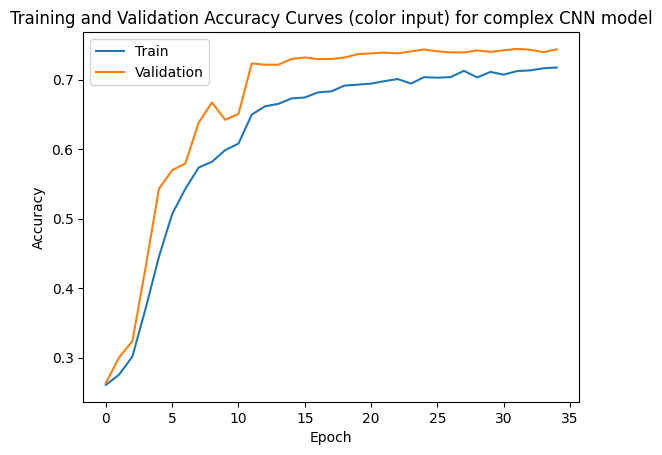

In [ ]:
# Plot the accuracy curves
plt.plot(history_complex.history['accuracy'], label='Train Accuracy')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves (color input) for complex CNN model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Found 126 images belonging to 4 classes.
4/4 [==============================] - 0s 40ms/step


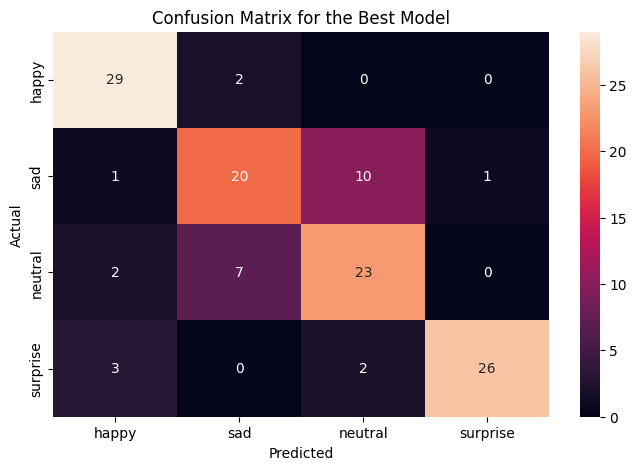

In [ ]:
# Confusion Matrix:

best_model = model_complex

# Create a test data generator without modifications
datagen_test_complex_gray = ImageDataGenerator(rescale=1./255)

# Create the test set using the test directory
test_generator_complex_gray = datagen_test_complex_gray.flow_from_directory(data_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = 128,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)

test_images_model_complex, test_labels_model_complex = next(test_generator_complex_gray)

# Predict with the model
pred_model_complex = model_complex.predict(test_images_model_complex)
pred_model_complex = np.argmax(pred_model_complex, axis = 1)
y_true_model_complex = np.argmax(test_labels_model_complex, axis = 1)

# Plot the heatmap using the confusion matrix
cm = confusion_matrix(y_true_model_complex, pred_model_complex)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for the Best Model')
plt.show()

In [ ]:
# Print the classification report
print(classification_report(y_true_model_complex, pred_model_complex, target_names=['happy', 'sad', 'neutral', 'surprise']))

              precision    recall  f1-score   support

       happy       0.83      0.94      0.88        31
         sad       0.69      0.62      0.66        32
     neutral       0.66      0.72      0.69        32
    surprise       0.96      0.84      0.90        31

    accuracy                           0.78       126
   macro avg       0.78      0.78      0.78       126
weighted avg       0.78      0.78      0.78       126



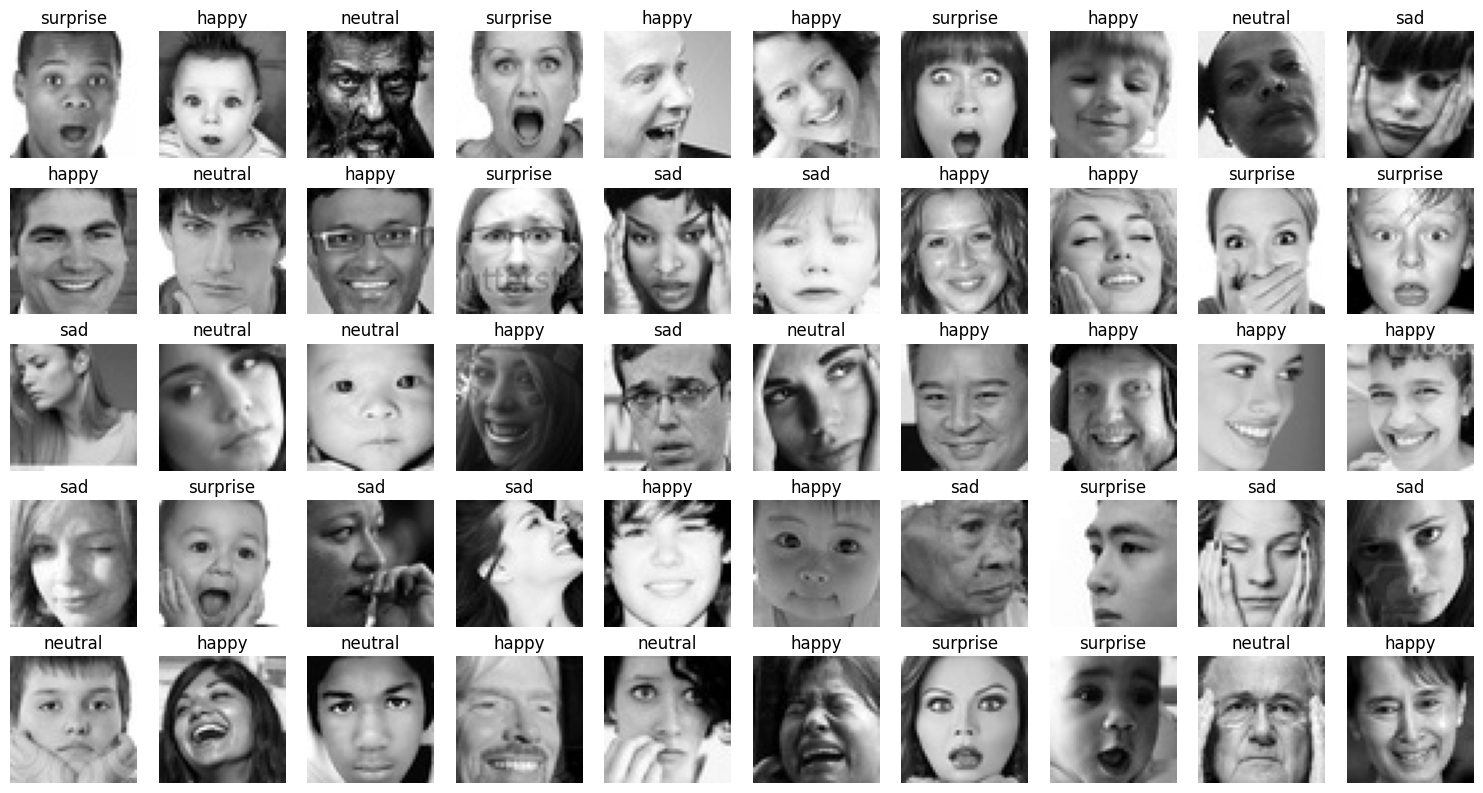

In [ ]:
# Now, we will predict again using the best model

# Map predictions to class labels
class_labels = ['happy', 'sad', 'neutral', 'surprise']  # Adjust based on your classes
predicted_labels = [class_labels[i] for i in pred_model_complex]

# Create a grid of 50 images with predictions
n_rows = 5
n_cols = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))

for i, ax in enumerate(axes.flat):
    if i < len(test_images_model_complex):
        ax.imshow(test_images_model_complex[i], cmap='gray')
        ax.set_title(predicted_labels[i])
        ax.axis('off')
    else:
        ax.axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

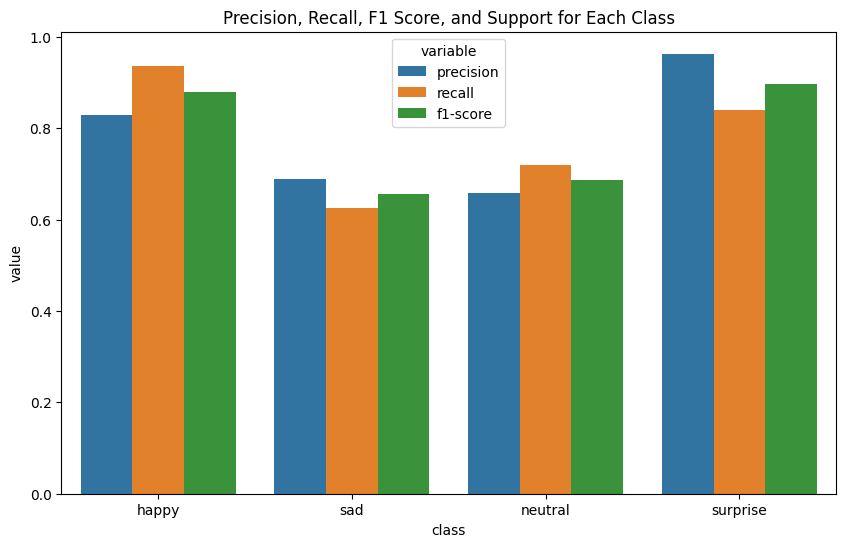

In [ ]:
# Plot the metrics

# Calculate classification report
report = classification_report(y_true_model_complex, pred_model_complex, output_dict=True)

# Convert report to dataframe
df_report = pd.DataFrame(report).transpose()

# Reset index to make 'class' a column
df_report.reset_index(level=0, inplace=True)
df_report = df_report.rename(columns={'index': 'class'})

# Melt dataframe to have metrics and values in separate columns
df_report_melted = pd.melt(df_report, id_vars='class', value_vars=['precision', 'recall', 'f1-score'])

df_report_melted = df_report_melted[df_report_melted['class'].isin(['0', '1', '2', '3'])]

# Replace class numbers with names
df_report_melted['class'].replace({'0': 'happy', '1': 'sad', '2': 'neutral', '3': 'surprise'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='value', hue='variable', data=df_report_melted)
plt.title('Precision, Recall, F1 Score, and Support for Each Class')
plt.show()

**Observations and Insights:**

This complex model is the best of all though it show an unusual dip in accuracy and showed signs of overfiting. After the dataset was preprocessed further, the model became more stable. The precision and recall values are also commendable, except *sad* and *neutral* whose scores were lower. It appears it was because there are non-face images  and that *sad* and *neutral* facial emotions are very similar and the model is confused about making up its mind. It is also noteworthy that this model was trained with grayscale images. I believe we got this performance as a result of the combination of the simplicity of the images with the complexity of the model.

**Conclusion:**

- I strongly believe our model must be built with the appropriate complexy to ensure that the model does not overfit.
- The dataset class distribution must be throughly looked at to check for tidyness as it can affect model perfomance.
- To further optimize out model we need to tune its hyperparameters.
- We also need to ensure that we continue to validate the business requirements to ensure this model is still valuable.
- Once the model is production-ready, we can deploy is as a microservice or some other kind of service.

### **Insights**

### **Refined insights**:
- The CNN model performed better on the image data with color input. When the layers of the model were increased it also increased the variance of the model and its performance reduced.

- The test folder has a balanced distribution of classes.
- The train folder has almost equal distribution with the surprise class lower than the rest.
- The validation folder has a lot of imbalance in the classes.

A good proportion (over 75%) of the *happy* images aligns with the label of the expressions on the faces. This should be ok for the task ahead. Also, the happy class in all folders is adequately represented.
Happy faces are expanded, eyes wide open, and can be easily unique compared to other classes so they are identified better than other classes.

Out of color and grayscale, color perfomed better. The transfer learning models did not perform better; they even showed problematic performance.

We built our own complex model to understand the nuances in the images and deliver the highest performance while ensuring that overfitting is prevented.
### **Comparison of various techniques and their relative performance**:
- The first model did ok with precision at 73% though showing signs of overfitting but the second one did worse. The transfer learning models showed the worst performance. The complex CNN model had the hightest performance.
- The transfer models performed poorly. I believe it is because they were trained on completely different dataset so they could not generalize well to completely different data.
- Performace can be improved further by:
	- Tuning the hyperparameters with different transformations of the images.
	- Doing some data cleaning e.g. ensuring that non-face images are removed and that facial expressions on the datasets must align with their label.

### **Proposal for the final solution design**:
I propose the **complex CNN model** to be adopted because:
  - The accuracy, precision, F1-score, and other metrics are the highest.
  - It has least variance and chances of overfitting.
  - Its robustness also opens up room for hyperparameter tuning (guided continuous improvement).

I believe one major reason the complex model did better than the rest with grayscale is the simplcity of grayscale images having one channel compared to color images that have 3. This makes training faster and more efficient.

Also lower dimensionality of grayscale images reduced overfitting in the complex model's output.
